Margarita Undalova

01/1365289

In [1]:
# Specify the path to the file
file_path = 'Frankenstein.txt'

# Open the file and check its contents
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Print the first 500 characters to make sure that the file was loaded
print(text[:500])


﻿The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
befor


In [2]:
# 1. Corpora Statistics
import os
from nltk.tokenize import word_tokenize

def load_documents(directory):
    documents = {}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # Check that the file has the .txt extension 
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                documents[filename] = text
    return documents

def compute_statistics(documents):
    stats = {
        'total_documents': len(documents),
        'total_lines': 0,
        'total_tokens': 0,
        'document_stats': {} # Dictionary to hold statistics for each document
    }

    for filename, text in documents.items():
        lines = text.splitlines() # Split the text into lines
        tokens = word_tokenize(text) # Tokenize the text into words

        # Local statistics for each text
        doc_stats = {
            'num_lines': len(lines),
            'num_tokens': len(tokens)
        }

        # Adding local document statistics to general statistics
        stats['total_lines'] += doc_stats['num_lines']
        stats['total_tokens'] += doc_stats['num_tokens']

        # Saving local statistics
        stats['document_stats'][filename] = doc_stats

    return stats

def display_statistics(stats):
    print(f"Total number of documents: {stats['total_documents']}")
    print(f"Total number of lines: {stats['total_lines']}")
    print(f"Total number of tokens: {stats['total_tokens']}\n")

    print("Statistics per document:")
    for filename, doc_stats in stats['document_stats'].items():
        print(f"Document: {filename}")
        print(f"  Number of lines: {doc_stats['num_lines']}")
        print(f"  Number of tokens: {doc_stats['num_tokens']}\n")

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"  # The path to the directory on the server
    documents = load_documents(directory) # Load all documents from the directory
    statistics = compute_statistics(documents) # Compute statistics for the loaded documents
    display_statistics(statistics) # Print the computed statistics


Total number of documents: 2
Total number of lines: 23485
Total number of tokens: 282232

Statistics per document:
Document: Frankenstein.txt
  Number of lines: 7634
  Number of tokens: 87749

Document: Dracula.txt
  Number of lines: 15851
  Number of tokens: 194483



In [3]:
# 2. Term Frequency
from collections import Counter

def term_frequency(text):
    tokens = word_tokenize(text.lower())  # Convert the text to lowercase
    words = [word for word in tokens if word.isalpha()]  # Exclude punctuation marks
    return Counter(words)  # Return a dictionary with word frequencies

def compute_term_frequencies(documents):
    global_term_freq = Counter()
    document_term_frequencies = {}

    for filename, text in documents.items():
        # Calculate word frequencies for each document
        term_freq = term_frequency(text)
        document_term_frequencies[filename] = term_freq

        # Updating global word frequency
        global_term_freq.update(term_freq)

    return document_term_frequencies, global_term_freq


def display_term_frequencies(document_term_frequencies, global_term_freq):
    print("Term frequencies per document:")
    for filename, term_freq in document_term_frequencies.items():
        print(f"Document: {filename}")
        for term, freq in term_freq.most_common(10):  # The frequency of each word in the text would take too much space, we display the top 10 words for each document
            print(f"  {term}: {freq}")
        print()

    print("Global term frequencies:")
    for term, freq in global_term_freq.most_common(10):  # the top 10 words for the entire corpus
        print(f"  {term}: {freq}")

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"  # The path to the directory on the server
    documents = load_documents(directory)
    
    # Counting term frequencies
    document_term_frequencies, global_term_freq = compute_term_frequencies(documents)
    
    # Displaying the results
    display_term_frequencies(document_term_frequencies, global_term_freq)


Term frequencies per document:
Document: Frankenstein.txt
  the: 4225
  and: 2960
  i: 2777
  of: 2630
  to: 2048
  my: 1683
  a: 1362
  in: 1130
  that: 1039
  was: 987

Document: Dracula.txt
  the: 8097
  and: 5968
  i: 4836
  to: 4552
  of: 3752
  a: 2974
  he: 2580
  in: 2561
  that: 2499
  it: 2170

Global term frequencies:
  the: 12322
  and: 8928
  i: 7613
  to: 6600
  of: 6382
  a: 4336
  in: 3691
  that: 3538
  he: 3168
  my: 2944


In [4]:
# 3. Type-Token Ratio
def type_token_ratio(text):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert it to lowercase
    words = [word for word in tokens if word.isalpha()]  # Exclude punctuation marks
    num_tokens = len(words)
    num_types = len(set(words))  # Unique words

    if num_tokens == 0:
        return 0
    return num_types / num_tokens

def compute_ttr_for_documents(documents):
    document_ttrs = {}
    combined_words = []

    for filename, text in documents.items():
        ttr = type_token_ratio(text)
        document_ttrs[filename] = ttr
        combined_words.extend([word for word in word_tokenize(text.lower()) if word.isalpha()])

    # Calculate TTR for the entire corpus
    global_ttr = type_token_ratio(' '.join(combined_words))

    return document_ttrs, global_ttr

def display_ttr(document_ttrs, global_ttr):
    print("Type-Token Ratio per document:")
    for filename, ttr in document_ttrs.items():
        print(f"Document: {filename}")
        print(f"  TTR: {ttr:.4f}\n")  # Print the TTR value (with 4 decimal places for for a more concise look)

    print(f"Global Type-Token Ratio for the entire corpus: {global_ttr:.4f}")

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"  # The path to the directory on the server
    documents = load_documents(directory)

    # Calculate TTR
    document_ttrs, global_ttr = compute_ttr_for_documents(documents)
    
    # Display the results
    display_ttr(document_ttrs, global_ttr)


Type-Token Ratio per document:
Document: Frankenstein.txt
  TTR: 0.0920

Document: Dracula.txt
  TTR: 0.0567

Global Type-Token Ratio for the entire corpus: 0.0503


In [5]:
# 4. N-Grams Analysis
import nltk
from nltk.util import ngrams
from collections import Counter

# Make sure the necessary resources for NLTK are downloaded
nltk.download('punkt')

def generate_ngrams(text, n):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert it to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Keep only words, excluding punctuation
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)

def compute_ngrams_for_documents(documents):
    document_ngrams = {}
    combined_tokens = []

    for filename, text in documents.items():
        unigrams = generate_ngrams(text, 1)
        bigrams = generate_ngrams(text, 2)
        trigrams = generate_ngrams(text, 3)

        document_ngrams[filename] = {
            'unigrams': unigrams,
            'bigrams': bigrams,
            'trigrams': trigrams
        }

        combined_tokens.extend(word_tokenize(text.lower()))  # Collecting all tokens for corpus analysis

    # Generating n-grams for the entire corpus
    combined_text = ' '.join(combined_tokens)
    corpus_ngrams = {
        'unigrams': generate_ngrams(combined_text, 1),
        'bigrams': generate_ngrams(combined_text, 2),
        'trigrams': generate_ngrams(combined_text, 3)
    }

    return document_ngrams, corpus_ngrams

def display_ngrams(document_ngrams, corpus_ngrams):
    print("N-Grams per document:")
    for filename, ngrams in document_ngrams.items():
        print(f"Document: {filename}")
        print("  Unigrams:")
        for unigram, freq in ngrams['unigrams'].most_common(10):  # Top-10 unigrams
            print(f"    {unigram}: {freq}")
        print("  Bigrams:")
        for bigram, freq in ngrams['bigrams'].most_common(10):  # Top-10 bigrams
            print(f"    {bigram}: {freq}")
        print("  Trigrams:")
        for trigram, freq in ngrams['trigrams'].most_common(10):  # Top-10 trigrams
            print(f"    {trigram}: {freq}")
        print()

    print("Global N-Grams for the entire corpus:")
    print("  Unigrams:")
    for unigram, freq in corpus_ngrams['unigrams'].most_common(10):  # Top-10 unigrams
        print(f"    {unigram}: {freq}")
    print("  Bigrams:")
    for bigram, freq in corpus_ngrams['bigrams'].most_common(10):  # Top-10 bigrams
        print(f"    {bigram}: {freq}")
    print("  Trigrams:")
    for trigram, freq in corpus_ngrams['trigrams'].most_common(10):  # Top-10 trigrams
        print(f"    {trigram}: {freq}")

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"  # The path to the directory on the server
    documents = load_documents(directory)
    
    # Count n-grams
    document_ngrams, corpus_ngrams = compute_ngrams_for_documents(documents)
    
    # Show results
    display_ngrams(document_ngrams, corpus_ngrams)


[nltk_data] Downloading package punkt to
[nltk_data]     /users/margarita.undalova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


N-Grams per document:
Document: Frankenstein.txt
  Unigrams:
    ('the',): 4225
    ('and',): 2960
    ('i',): 2777
    ('of',): 2630
    ('to',): 2048
    ('my',): 1683
    ('a',): 1362
    ('in',): 1130
    ('that',): 1039
    ('was',): 987
  Bigrams:
    ('of', 'the'): 553
    ('in', 'the'): 283
    ('of', 'my'): 244
    ('i', 'was'): 215
    ('and', 'i'): 211
    ('i', 'had'): 209
    ('to', 'the'): 203
    ('that', 'i'): 199
    ('and', 'the'): 196
    ('which', 'i'): 147
  Trigrams:
    ('i', 'did', 'not'): 37
    ('which', 'i', 'had'): 34
    ('i', 'could', 'not'): 32
    ('i', 'can', 'not'): 28
    ('the', 'old', 'man'): 27
    ('but', 'i', 'was'): 24
    ('that', 'i', 'was'): 20
    ('that', 'i', 'had'): 20
    ('the', 'project', 'gutenberg'): 19
    ('i', 'do', 'not'): 19

Document: Dracula.txt
  Unigrams:
    ('the',): 8097
    ('and',): 5968
    ('i',): 4836
    ('to',): 4552
    ('of',): 3752
    ('a',): 2974
    ('he',): 2580
    ('in',): 2561
    ('that',): 2499
    ('it

In [6]:
# 5. Concordance

from nltk.text import Text


def generate_concordance(text, word, window=5):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert it to lowercase
    text_obj = Text(tokens)  # Create a Text object for analysis
    concordance_list = []
    
    # We find all occurrences of the word and form contexts
    for index in range(len(tokens)):
        if tokens[index] == word.lower():
            left_context = tokens[max(index - window, 0):index]
            right_context = tokens[index + 1:min(index + window + 1, len(tokens))]
            concordance_list.append((' '.join(left_context), word, ' '.join(right_context)))
    
    return concordance_list

def display_concordance(concordance_list, word):
    print(f"Concordance for the word '{word}':")
    for left_context, target_word, right_context in concordance_list:
        print(f"...{left_context} {target_word} {right_context}...")
    print()

def compute_concordance_for_documents(documents, target_word):
    document_concordances = {}
    all_tokens = []

    for filename, text in documents.items():
        concordance_list = generate_concordance(text, target_word)
        document_concordances[filename] = concordance_list

        # We collect all tokens for corpus analysis
        tokens = word_tokenize(text.lower())
        all_tokens.extend(tokens)

    # Generating context for the entire corpus
    combined_text = ' '.join(all_tokens)
    corpus_concordance_list = generate_concordance(combined_text, target_word)

    return document_concordances, corpus_concordance_list

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"  # Specify the path to the directory on the server
    documents = load_documents(directory)
    
    target_word = "blood"  # Replace with the word you want to show contexts for
    document_concordances, corpus_concordance_list = compute_concordance_for_documents(documents, target_word)
    
    # We print contexts for each document
    for filename, concordance_list in document_concordances.items():
        print(f"Concordance in document: {filename}")
        display_concordance(concordance_list, target_word)
    
    # We print contexts for entire corpus
    print("Concordance in the entire corpus:")
    display_concordance(corpus_concordance_list, target_word)


Concordance in document: Frankenstein.txt
Concordance for the word 'blood':
...when no exercise prevents the blood from actually freezing in your...
...can not endure to spill blood . he is , moreover...
...they have discovered how the blood circulates , and the nature...
...hands yet reeking with the blood of innocence , believe that...
...i was alive . the blood flowed freely in my veins...
...for each other ’ s blood . yet i am certainly...
...it be satiated with the blood of your remaining friends. ”...
..., descent , and noble blood . “ the words induced...
...but the fever of my blood did not allow me to...
...barrier was sealed with the blood of william and justine ;...
...went to it in cold blood , and my heart often...
...shall i , in cool blood , set loose upon the...
...i have shed my own blood , drop by drop ,...
...was not yet satiated with blood , he had murdered clerval...
...been in his deeds of blood , i should almost regard...
...; i could feel the blood trickling in 

In [7]:
# 6. Collocations / Multiword Expressions

from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

def find_collocations(text, n):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert it to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation marks
    
    if n == 2:
        # Bigrams
        finder = BigramCollocationFinder.from_words(tokens)
        scored = finder.score_ngrams(BigramAssocMeasures.likelihood_ratio)
    elif n == 3:
        # Trigrams
        finder = TrigramCollocationFinder.from_words(tokens)
        scored = finder.score_ngrams(TrigramAssocMeasures.likelihood_ratio)
    else:
        raise ValueError("Only bigrams and trigrams are supported")

    return scored

def display_collocations(scored_collocations, n):
    print(f"Top {n}-gram Collocations:")
    for collocation, score in scored_collocations[:10]:  # Top-10 collocations
        print(f"{' '.join(collocation)}: {score:.4f}")
    print()

def compute_collocations_for_documents(documents):
    document_collocations = {}
    all_tokens = []

    for filename, text in documents.items():
        bigram_collocations = find_collocations(text, 2)
        trigram_collocations = find_collocations(text, 3)

        document_collocations[filename] = {
            'bigrams': bigram_collocations,
            'trigrams': trigram_collocations
        }

        # Collect all tokens for corpus analysis
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha()]
        all_tokens.extend(tokens)

    # Generating collocations for the entire corpus
    combined_text = ' '.join(all_tokens)
    combined_bigram_collocations = find_collocations(combined_text, 2)
    combined_trigram_collocations = find_collocations(combined_text, 3)

    corpus_collocations = {
        'bigrams': combined_bigram_collocations,
        'trigrams': combined_trigram_collocations
    }

    return document_collocations, corpus_collocations

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"  # Specify the path to the directory on the server
    documents = load_documents(directory)

    document_collocations, corpus_collocations = compute_collocations_for_documents(documents)
    
    # We output collocations for each document
    for filename, collocations in document_collocations.items():
        print(f"Collocations in document: {filename}")
        display_collocations(collocations['bigrams'], 2)
        display_collocations(collocations['trigrams'], 3)
    
    # We derive collocations for the entire corpus
    print("Collocations in the entire corpus:")
    display_collocations(corpus_collocations['bigrams'], 2)
    display_collocations(corpus_collocations['trigrams'], 3)


Collocations in document: Frankenstein.txt
Top 2-gram Collocations:
of the: 761.9227
i am: 662.5309
i had: 599.1777
my father: 590.1426
did not: 577.8722
it was: 573.8158
had been: 544.1075
the the: 480.5675
do not: 479.3044
in the: 467.2969

Top 3-gram Collocations:
the cottage of: 4008.9376
the whole of: 3924.7273
the terms of: 3916.1513
the murderer of: 3904.9060
the scene of: 3902.1929
the first of: 3902.1278
the sea of: 3896.3348
the cause of: 3893.8394
the night of: 3892.4737
the lake of: 3889.5418

Collocations in document: Dracula.txt
Top 2-gram Collocations:
van helsing: 4490.4960
i am: 1977.7658
of the: 1655.0487
i could: 1271.6080
it is: 1193.9291
in the: 1177.7243
did not: 1155.4534
don t: 1148.0344
madam mina: 1133.8935
it was: 1099.0373

Top 3-gram Collocations:
van helsing s: 4577.6805
dr van helsing: 4576.8038
said van helsing: 4564.5361
van helsing said: 4553.0261
abraham van helsing: 4550.1857
professor van helsing: 4532.9107
van helsing stepped: 4530.6183
van helsing

In [8]:
# 7. Unique Word List


def generate_unique_words(text):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert it to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Removing punctuation marks
    unique_words = set(tokens)  # We create the set of unique words
    return unique_words

def save_unique_words_to_file(filename, unique_words):
    with open(filename, 'w') as file:
        for word in sorted(unique_words):  # Sorting words for better comprehension
            file.write(f"{word}\n")

def compute_unique_words_for_documents(documents):
    document_unique_words = {}
    all_tokens = []

    for filename, text in documents.items():
        unique_words = generate_unique_words(text)
        document_unique_words[filename] = unique_words

        # Collect all tokens for corpus analysis
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha()]
        all_tokens.extend(tokens)

    # Generating unique words for the entire corpus
    combined_text = ' '.join(all_tokens)
    corpus_unique_words = generate_unique_words(combined_text)

    return document_unique_words, corpus_unique_words

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"  # Specify the path to the directory on the server
    documents = load_documents(directory)

    document_unique_words, corpus_unique_words = compute_unique_words_for_documents(documents)
    
    # We save unique words for each document
    for filename, unique_words in document_unique_words.items():
        file_path = os.path.join(directory, f"unique_words_{os.path.basename(filename)}.txt")
        save_unique_words_to_file(file_path, unique_words)
        print(f"Unique words for document '{filename}' saved to {file_path}")
    
    # Preserving unique words for the entire corpus
    corpus_file_path = os.path.join(directory, "unique_words_corpus.txt")
    save_unique_words_to_file(corpus_file_path, corpus_unique_words)
    print(f"Unique words for the entire corpus saved to {corpus_file_path}")


Unique words for document 'Frankenstein.txt' saved to /users/margarita.undalova/texts/unique_words_Frankenstein.txt.txt
Unique words for document 'Dracula.txt' saved to /users/margarita.undalova/texts/unique_words_Dracula.txt.txt
Unique words for the entire corpus saved to /users/margarita.undalova/texts/unique_words_corpus.txt


In [9]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


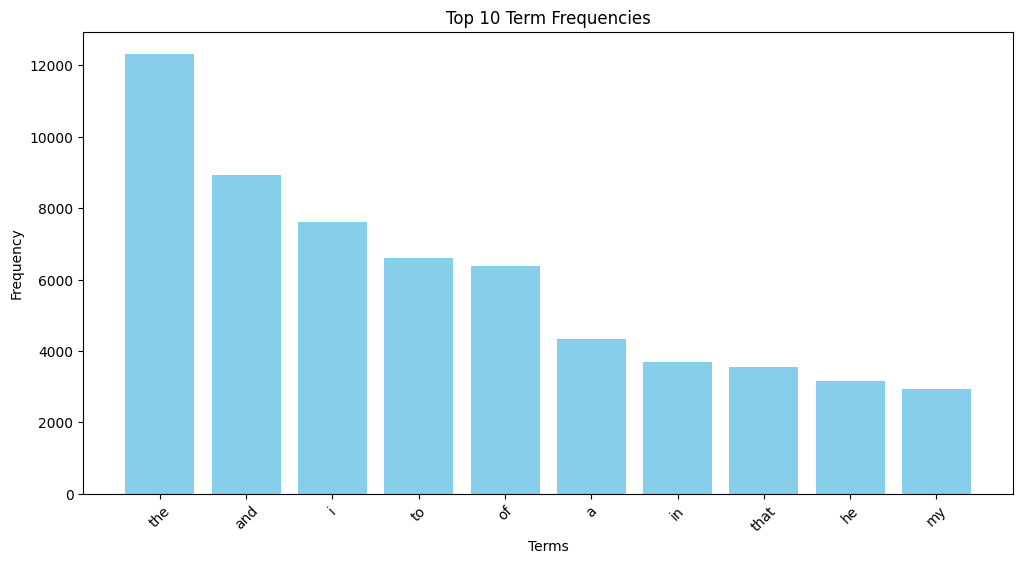

In [10]:
# Bonus Features
# Graphical Output displaying term frequencies

import matplotlib.pyplot as plt

def plot_term_frequencies(global_term_freq):
    # Get the most common terms
    terms, frequencies = zip(*global_term_freq.most_common(10))
    
    plt.figure(figsize=(12, 6)) # Set up the figure size
    plt.bar(terms, frequencies, color='skyblue') # This colour resembles uni Konstanz theme
    plt.xlabel('Terms') # Label for the x-axis
    plt.ylabel('Frequency') # Label for the y-axis
    plt.title('Top 10 Term Frequencies') # Title of the whole plot
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.show() # Display the plot

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"
    documents = load_documents(directory)
    
    document_term_frequencies, global_term_freq = compute_term_frequencies(documents)
    plot_term_frequencies(global_term_freq)


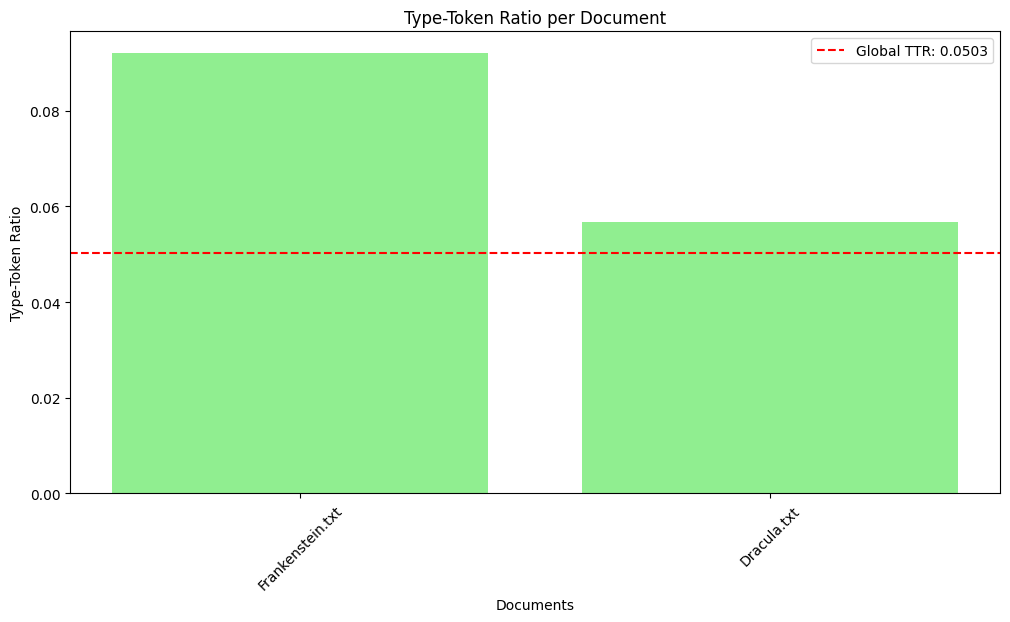

In [13]:
# Graphical Output displaying type-token ratios

def plot_type_token_ratios(document_ttrs, global_ttr):
    filenames = list(document_ttrs.keys())
    ttr_values = list(document_ttrs.values())
    
    plt.figure(figsize=(12, 6)) # Set up the figure size
    plt.bar(filenames, ttr_values, color='lightgreen')
    plt.axhline(y=global_ttr, color='red', linestyle='--', label=f'Global TTR: {global_ttr:.4f}')
    plt.xlabel('Documents') # Label for the x-axis
    plt.ylabel('Type-Token Ratio') # Label for the y-axis
    plt.title('Type-Token Ratio per Document') # Title of the whole plot
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.legend()
    plt.show() # Display the plot

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"
    documents = load_documents(directory)
    
    document_ttrs, global_ttr = compute_ttr_for_documents(documents)
    plot_type_token_ratios(document_ttrs, global_ttr)


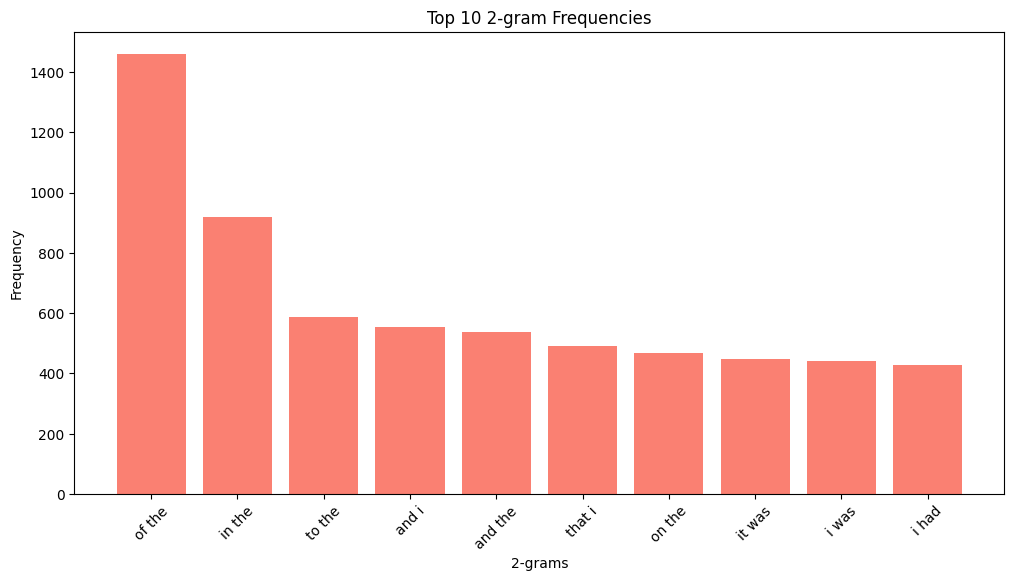

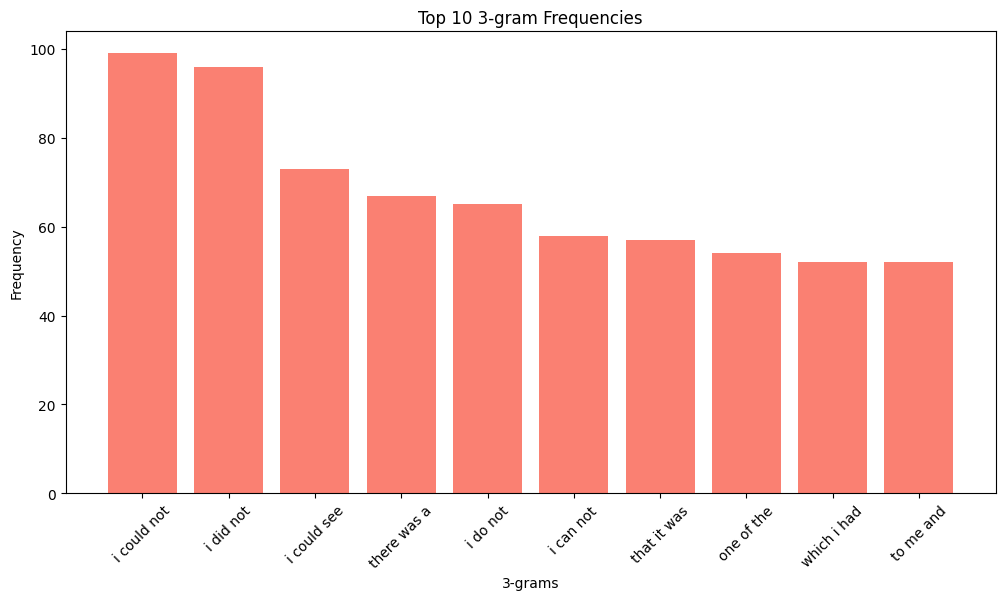

In [12]:
# Graphical representation of 2 and 3-gram frequences

def plot_ngram_frequencies(ngrams, n):
    terms, frequencies = zip(*ngrams.most_common(10))
    
    plt.figure(figsize=(12, 6)) # Set up the figure size
    plt.bar([' '.join(term) for term in terms], frequencies, color='salmon')
    plt.xlabel(f'{n}-grams') # Label for the x-axis
    plt.ylabel('Frequency') # Label for the y-axis
    plt.title(f'Top 10 {n}-gram Frequencies') # Title of the whole plot
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.show() # Display the plot

if __name__ == "__main__":
    directory = "/users/margarita.undalova/texts"
    documents = load_documents(directory)
    
    document_ngrams, corpus_ngrams = compute_ngrams_for_documents(documents)
    
    # Plot bigrams and trigrams
    plot_ngram_frequencies(corpus_ngrams['bigrams'], 2)
    plot_ngram_frequencies(corpus_ngrams['trigrams'], 3)
